In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import morphology
import gc
from scipy.ndimage import gaussian_filter

## To-do: Change input/output and working directories

In [2]:
show_images = 1                                 # to display images in real-time
save_intermediate_images = 0                    # save R-G-B and Y-Cb-Cr Channels
input_dir = "Data/Melan-A"               # all files in here will be read, expected filenames: <filename>.tif
output_dir = "Extracted Epithelium/Presentation 7 Extractions/Melan-A"         # epithelia and stroma will be saved here
run_over_all_images = 1                         # to run over all images in 'input_dir'
overwrite_output = 0                            # to overwrite previous output
save_epithelia_and_stroma = 1                   # to save epithelia and stroma output

# visualizations
output_visualization_dir = "Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations"         # output for visual comparison b/w input_img-segmented_stroma-segmented_epithelia
save_bins_representation = 1                    # to save Lumma and Red Chroma Bins for visualization

In [3]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/kevin/Downloads/Northwestern University/Data Science/STAT_390/Presentation 7


In [4]:
os.chdir("/Users/kevin/Downloads/Northwestern University/Data Science/STAT_390")
print("New Working Directory:", os.getcwd())

New Working Directory: /Users/kevin/Downloads/Northwestern University/Data Science/STAT_390


In [5]:
# Plot the image
def imshow(img, title):
    global show_images
    if show_images == 0:
        return
    
    plt.imshow(img)
    plt.tight_layout()
    plt.axis('off')
    plt.title(title)
    plt.show(block=True)
    plt.close('all')

if not os.path.isdir(input_dir):
    print("input_dir: '" + input_dir + "' directory does not exist! Exiting...")
    exit()

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
    print("output_dir: '" + output_dir + "' directory created.")

if not os.path.isdir(output_visualization_dir):
    os.mkdir(output_visualization_dir)
    print("output_visualization_dir: '" + output_visualization_dir + "' directory created.")

In [111]:
# Files and Folders in Input Dir
files = os.listdir(input_dir)
# Filtering only the files.
files = [f for f in files if os.path.isfile(input_dir+'/'+f)]
files

['h1810898A mela_ROI_1.tif',
 'h1812404A melan a_ROI_1.tif',
 's__h2114166 melan_ROI_1.tif',
 '.DS_Store',
 'h1812404B melan a_ROI_2.tif',
 'h1939646  mela_ROI_1.tif',
 's__h2114163 melan_ROI_4.tif']

In [109]:
sample = [files[0], files[1], files[-2]]
sample

['h1810898A mela_ROI_1.tif',
 'h1812404A melan a_ROI_1.tif',
 'h1939646  mela_ROI_1.tif']

In [112]:
sample2 = [files[-3]]
sample2

['h1812404B melan a_ROI_2.tif']

## Segmentation Algorithm for Melan-A Stains

In [113]:
def go(folder):
    
    for f in folder:
    
        if f == '.DS_Store':
            print('Skipped iteration')
            continue

        print('Entered loop')

        input_filepath = os.path.join(input_dir, f)
        print(input_filepath)

        print('Checkpoint 1')

        
        # Load Image
        img_rgb = cv2.imread(input_filepath)
        img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
        #imshow(img_rgb, 'img_rgb')
        
        
        # Not needed
        '''
        if save_bins_representation or show_images:
            fig = plt.figure(num=1, clear=True, figsize=(20, 12))
            ax_arr = fig.subplots(1, 4, sharex=True, sharey=True)
            fig.suptitle('RGB - R - G - B', fontsize = 25)
            ax1, ax2, ax3, ax4 = ax_arr.ravel()
            ax1.imshow(img_rgb)
            ax1.set_title('RGB888', fontsize = 20)
            ax1.set_axis_off()
            ax2.imshow(img_rgb[:,:,0])
            ax2.set_title('Red Channel', fontsize = 20)
            ax2.set_axis_off()
            ax3.imshow(img_rgb[:,:,1])
            ax3.set_title('Green Channel', fontsize = 20)
            ax3.set_axis_off()
            ax4.imshow(img_rgb[:,:,2])
            ax4.set_title('Blue Channel', fontsize = 20)
            ax4.set_axis_off()
            plt.tight_layout()
            if save_bins_representation:
                filename = os.path.join(output_visualization_dir, f + " RGB Channels.png")
                plt.savefig(filename)
                print(filename + " saved")

            if show_images:
                plt.show()
        '''


        img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
        
        
        # Not needed
        '''
        if save_bins_representation or show_images:
            fig = plt.figure(num=1, clear=True, figsize=(20, 12))
            ax_arr = fig.subplots(1, 5, sharex=True, sharey=True)
            fig.suptitle('RGB888 - Y - Cb - Cr - Cg', fontsize = 25)
            ax1, ax2, ax3, ax4, ax5 = ax_arr.ravel()
            ax1.imshow(img_rgb)
            ax1.set_title('RGB888', fontsize = 20)
            ax1.set_axis_off()
            ax2.imshow(img_ycrcb[:,:,0])
            ax2.set_title('Y Channel', fontsize = 20)
            ax2.set_axis_off()
            ax3.imshow(img_ycrcb[:,:,1])
            ax3.set_title('Cb Channel', fontsize = 20)
            ax3.set_axis_off()
            ax4.imshow(img_ycrcb[:,:,2])
            ax4.set_title('Cr Channel', fontsize = 20)
            ax4.set_axis_off()
            img_Cg = img_ycrcb[:,:,0] - 0.299 * img_ycrcb[:,:,0] - 0.587 * img_ycrcb[:,:,2] - 0.114 * img_ycrcb[:,:,1]
            ax5.imshow(img_Cg)
            ax5.set_title('Cg Channel', fontsize = 20)
            ax5.set_axis_off()
            plt.tight_layout()
            if save_bins_representation:
                filename = os.path.join(output_visualization_dir, f + " YCbCr Channels.png")
                plt.savefig(filename)
                print(filename + " saved")

            if show_images:
                plt.show()
        '''

        print('Checkpoint 2')


        # Still obtaining background from lumma channel

        # define binning in lumma image
        lumma_bins_n = 20
        divisor = (np.floor(255 / lumma_bins_n).astype(np.uint8))

        # decimate lumma image into lumma_bins_n
        lumma_binned = (np.floor(img_ycrcb[:,:,0]/divisor)).astype(np.uint8)

        
        ## Not needed: figure to show different lumma bins
        '''
        if save_bins_representation:
            fig = plt.figure(num=1, clear=True, figsize=(20, 12))
            ax_arr = fig.subplots(2, int(lumma_bins_n/2) + 1, sharex=True, sharey=True)
            fig.suptitle(f + " Lumma " + str(lumma_bins_n) + " Bins Representation", fontsize = 25)
            row=0
            col=0
            for bin_i in range(0,lumma_bins_n + 2):
                ax_arr[row,col].set_title("bin " + str(bin_i), fontsize = 20)
                ax_arr[row,col].set_axis_off()
                ax_arr[row,col].imshow(lumma_binned == bin_i)
                col=col+1
                if col == int(lumma_bins_n/2) + 1:
                    row = 1
                    col = 0

            plt.tight_layout()
            filename = os.path.join(output_visualization_dir, f + " Lumma " + str(lumma_bins_n) + " Bins Representation.png")
            plt.savefig(filename)
            print(filename + " saved")
            if show_images:
                plt.show()
        '''

        # find bin with most number of pixels

        most_pixels_bin = -1;
        most_pixels = 0
        for bin_i in range(0,lumma_bins_n+1):
            n_pixels = np.count_nonzero(lumma_binned == bin_i)
            #print("bin = " + str(bin_i) + "   n_pixels = " + str(n_pixels))
            if n_pixels > most_pixels:
                most_pixels = n_pixels
                most_pixels_bin = bin_i

        print("\nlumma_binned: most_pixels_bin = " + str(most_pixels_bin) + "   most_pixels = " + str(most_pixels))

        # find background

        background_bin = most_pixels_bin
        background = lumma_binned == background_bin
        #imshow(background, "bg1 bin=" + str(most_pixels_bin))
        background = morphology.remove_small_objects(background, 5000)
        #imshow(background, "bg2")
        background = morphology.remove_small_holes(background, 10000)
        print('background found')
        imshow(background, "background")
        '''
        if save_intermediate_images:
            filename = os.path.join(output_dir, f + " Lumma Background Mask.png")
            cv2.imwrite(filename, background.astype(np.uint8)*255, [cv2.IMWRITE_PNG_COMPRESSION , 0])
            print(filename + " saved")
        '''


        # get Red Chroma channel

        #imshow(img_ycrcb[:,:,2], "img_Cr")

        # we will get epithelia from Red Chroma channel

        # define binning in Red Chroma image
        
        Cr_bins_n = 100
# Tried: Cr_bins_n = 200
        divisor = (np.floor(255 / Cr_bins_n).astype(np.uint8))

        # decimate Red Chroma image into Cr_bins_n
        Cr_binned = (np.floor(img_ycrcb[:,:,2]/divisor)).astype(np.uint8)

        ## figure to show different Red Chroma bins
        if save_bins_representation:
            fig = plt.figure(num=1, clear=True, figsize=(20, 12))
            ax_arr = fig.subplots(2, 6, sharex=True, sharey=True)
            fig.suptitle(f + " Red Chroma " + str(Cr_bins_n) + " Bins Representation", fontsize = 25)
            row=0
            col=0
            for bin_i in range(0,12):
                ax_arr[row,col].set_title("bin " + str(bin_i + 57), fontsize = 20)
                ax_arr[row,col].set_axis_off()
                ax_arr[row,col].imshow(Cr_binned == (bin_i + 57))
                col=col+1
                if col == 6:
                    row = 1
                    col = 0

            plt.tight_layout()
            filename = os.path.join(output_visualization_dir, f + " Red Chroma " + str(Cr_bins_n) + " Bins Representation.png")
            plt.savefig(filename)
            print(filename + " saved")
            if show_images:
                plt.show()


        # find bin with most number of pixels

        most_pixels_bin = -1;
        most_pixels = 0
        for bin_i in range(0,Cr_bins_n+1):
            n_pixels = np.count_nonzero(Cr_binned == bin_i)
            #print("bin = " + str(bin_i) + "   n_pixels = " + str(n_pixels))
            if n_pixels > most_pixels:
                most_pixels = n_pixels
                most_pixels_bin = bin_i

        print("\nCr_binned: most_pixels_bin = " + str(most_pixels_bin) + "   most_pixels = " + str(most_pixels))

        # Find Definite Stroma
        stroma_bin = most_pixels_bin
        stroma = Cr_binned == stroma_bin
        stroma = stroma + (Cr_binned == stroma_bin - 1)
        stroma = stroma + (Cr_binned == stroma_bin + 1)
        #imshow(stroma, "stroma1")
        
        # remove background pixels from stroma
        stroma = stroma * np.invert(background)
        #imshow(stroma, "stroma2")
        
        # dilation
        stroma = morphology.dilation(stroma, morphology.square(3))
        #imshow(stroma, "stroma3")
        
        # remove small objects
        stroma = morphology.remove_small_objects(stroma, 1000)
        #imshow(stroma, "definite stroma")
        print('definite stroma found')


        print('Checkpoint 3')


        
        # Find Epithelia

# Previously: epithelia_bin = stroma_bin + 2
# Determined by observing Red Chroma bins
        epithelia_bin = stroma_bin - 2     
        print('Cr_binned=', Cr_binned)
        epithelia = Cr_binned == epithelia_bin
        epithelia = epithelia + (Cr_binned == epithelia_bin - 1)
        epithelia = epithelia + (Cr_binned == epithelia_bin - 2)
# Previously: epithelia = epithelia + (Cr_binned == epithelia_bin - 3)
# Previously: epithelia = epithelia + (Cr_binned == epithelia_bin - 4)
        imshow(epithelia, "epithelia1")
        
        # remove background pixels from epithelia
        epithelia = epithelia * np.invert(background)
        imshow(epithelia, "epithelia2 -- removing background pixels")
        
# remove stroma pixels from epithelia
# epithelia = epithelia * np.invert(stroma)
# imshow(epithelia, "epithelia3")

# epithelia = epithelia * np.invert(img_ycrcb[:,:,1] < 120)
# imshow(epithelia, "epithelia4")

        # dilation
# Previously: epithelia = morphology.dilation(epithelia, morphology.square(2))
        epithelia = morphology.dilation(epithelia, morphology.square(3))
        imshow(epithelia, "epithelia3 -- dilating by factor 3")
        
        # apply gaussian smoothing to the binary mask
        epithelia = gaussian_filter(epithelia.astype(float), sigma=4)
        epithelia = epithelia > 0.25  # Convert back to binary by thresholding
        imshow(epithelia, "epithelia4 -- Gaussian smoothing with sigma 4")
        
        
# No longer need to remove very small objects        
# Test:    
#epithelia = morphology.remove_small_objects(epithelia, 500)
#imshow(epithelia, "TEST: epithelia -- remove small objects below 500")
    
    
        # remove small holes
# Previously: epithelia = morphology.remove_small_holes(epithelia, 10000)
        epithelia = morphology.remove_small_holes(epithelia, 2500)
        imshow(epithelia, "epithelia5 -- removing small holes below 2500")
        
        
        # No longer need to remove very small objects
        # Previously:
        '''
        small_obj_size_to_remove = 10000
        
            if percent_epithelia_pixels < 0.01:
                small_obj_size_to_remove = 1000
            elif percent_epithelia_pixels < 0.03:
                small_obj_size_to_remove = 2000

        small_obj_size_to_remove = 5000
        if percent_epithelia_pixels < 0.025:
            small_obj_size_to_remove = 500 
        elif percent_epithelia_pixels < 0.075:
            small_obj_size_to_remove = 1500
        print("small_obj_size_to_remove = " + str(small_obj_size_to_remove))
    
        epithelia = morphology.remove_small_objects(epithelia, small_obj_size_to_remove)
        imshow(epithelia, "epithelia8")
        '''

######### dilation
        epithelia = morphology.dilation(epithelia, morphology.square(50)) # Determined by trial-and-error
        imshow(epithelia, "epithelia6 -- dilating by factor 50")
        
        # removing "small" objects after dilation
        epithelia = morphology.remove_small_objects(epithelia, 15000) # Determined by trial-and-error
        imshow(epithelia, "epithelia7 -- remove small objects below 15000")
        
        # remove small holes
        epithelia = morphology.remove_small_holes(epithelia, 20000)
        print('epithelia found')
        imshow(epithelia, "extracted epithelia")
        if save_intermediate_images:
            filename = os.path.join(output_dir, f + " Epithelia Mask.png")
            cv2.imwrite(filename, epithelia.astype(np.uint8)*255, [cv2.IMWRITE_PNG_COMPRESSION , 0])
            print(filename + " saved")

        # Apply the epithelia mask to image
        epithelia_img = cv2.bitwise_and(img_rgb,img_rgb,mask = (epithelia.astype(np.uint8) * 255))
        imshow(epithelia_img, "epithelia_img")
        if save_epithelia_and_stroma:
            filename = os.path.join(output_dir, f + " Epithelia.png")
            cv2.imwrite(filename, cv2.cvtColor(epithelia_img, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION , 0])
            print(filename + " saved")

            

        # Expanded Stroma
        stroma = Cr_binned == stroma_bin
        stroma = stroma + (Cr_binned == stroma_bin)
        stroma = stroma + (Cr_binned == stroma_bin - 1)
        stroma = stroma + (Cr_binned == stroma_bin - 2)
        #imshow(stroma, "stroma1")
        
        # remove background pixels from stroma
        stroma = stroma * np.invert(background)
        #imshow(stroma, "stroma2")
        
        # remove small holes
        stroma = morphology.remove_small_holes(stroma, 10000)
        #imshow(stroma, "stroma3")
        
        # dilation
        stroma = morphology.dilation(stroma, morphology.square(10))
        #imshow(stroma, "stroma4")
        
        # remove small holes
        stroma = morphology.remove_small_holes(stroma, 20000)
        #imshow(stroma, "stroma5")
        
        # remove background pixels from expanded stroma
        stroma = stroma * np.invert(background)
        # remove stroma pixels from expanded stroma
        stroma = stroma * np.invert(epithelia)
        print('stroma expanded')
        #imshow(stroma, "stroma")
        if save_intermediate_images:
            filename = os.path.join(output_dir, f + " Stroma Mask.png")
            cv2.imwrite(filename, stroma.astype(np.uint8)*255, [cv2.IMWRITE_PNG_COMPRESSION , 0])
            print(filename + " saved")

        # Apply the stroma mask to image
        stroma_img = cv2.bitwise_and(img_rgb,img_rgb,mask = (stroma.astype(np.uint8) * 255))
        #imshow(stroma_img, "stroma_img")
        if save_epithelia_and_stroma:
            filename = os.path.join(output_dir, f + " Stroma.png")
            cv2.imwrite(filename, cv2.cvtColor(stroma_img, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION , 0])
            print(filename + " saved")



        # Save a segmentation visualization image
        fig = plt.figure(num=1, clear=True, figsize=(20, 12))
        ax_arr = fig.subplots(1, 3, sharex=True, sharey=True)
        fig.suptitle('Input - Stroma - Epithelia Segmentation Visualization', fontsize = 25)
        ax1, ax2, ax3 = ax_arr.ravel()
        ax1.imshow(img_rgb)
        ax1.set_title('img_rgb', fontsize = 20)
        ax1.set_axis_off()
        ax2.imshow(stroma_img)
        ax2.set_title('stroma_img', fontsize = 20)
        ax2.set_axis_off()
        ax3.imshow(epithelia_img)
        ax3.set_title('epithelia_img', fontsize = 20)
        ax3.set_axis_off()
        plt.tight_layout()
        filename = os.path.join(output_visualization_dir, f + ".png")
        plt.savefig(filename)
        print(filename + " saved")
        if show_images:
            plt.show()

        print('ITERATION FINISHED')

        del img_rgb, img_ycrcb, stroma_img, epithelia_img, background, epithelia, stroma, Cr_binned, lumma_binned, filename
        
        # Force a garbage collection
        gc.collect()

        if run_over_all_images == 0:
            break

    print("done!")

# Testing on Melan-A Stains

Entered loop
Data/Melan-A/h1810898A mela_ROI_1.tif
Checkpoint 1
Checkpoint 2

lumma_binned: most_pixels_bin = 19   most_pixels = 50210953
background found


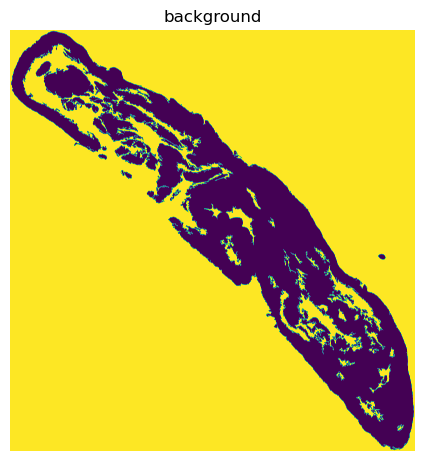

Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1810898A mela_ROI_1.tif Red Chroma 100 Bins Representation.png saved


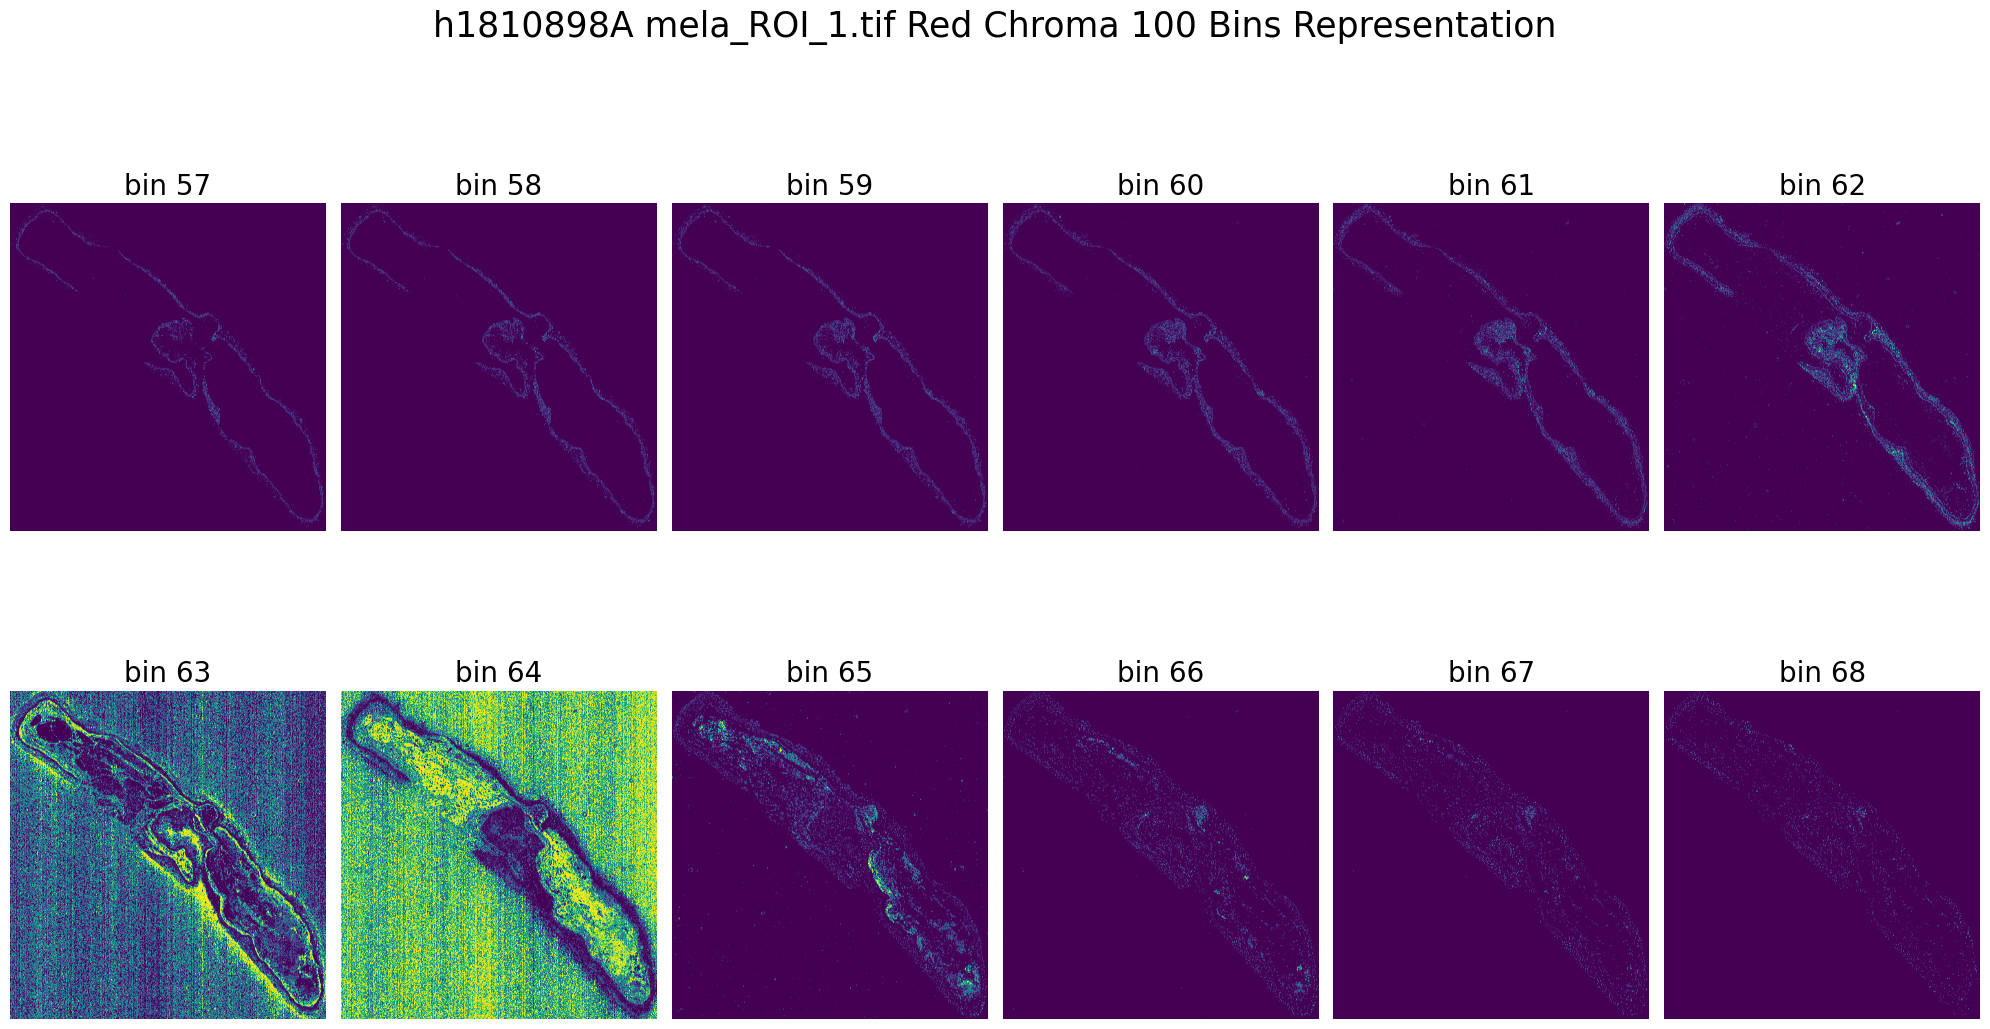


Cr_binned: most_pixels_bin = 64   most_pixels = 38642490
definite stroma found
Checkpoint 3
Cr_binned= [[63 63 63 ... 64 64 64]
 [63 63 63 ... 64 64 64]
 [63 63 63 ... 64 64 64]
 ...
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]]


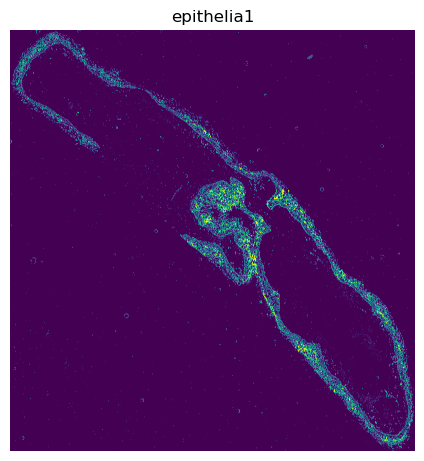

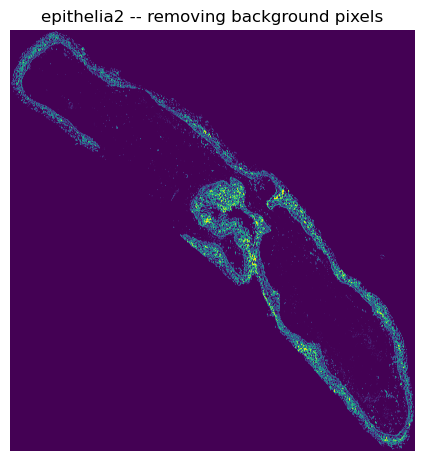

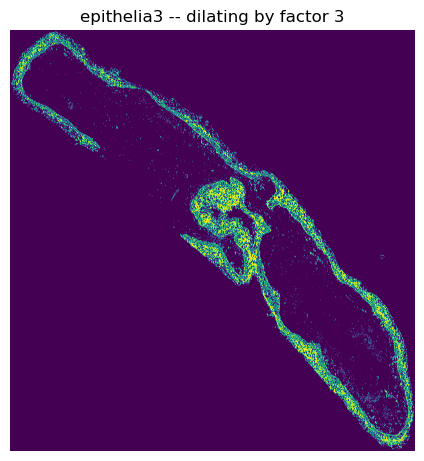

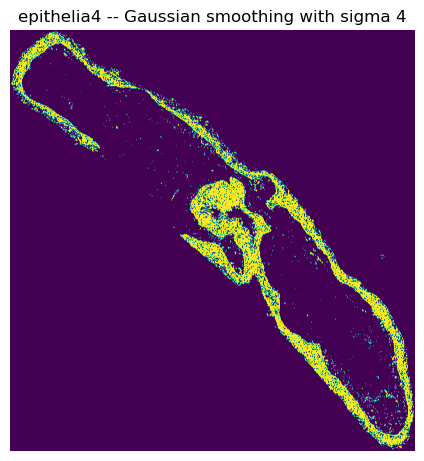

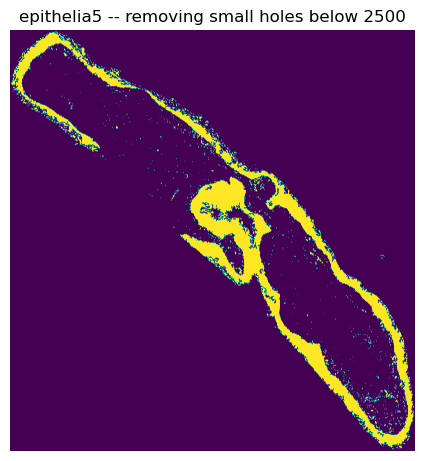

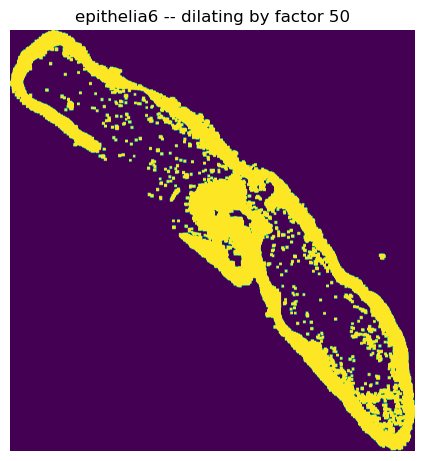

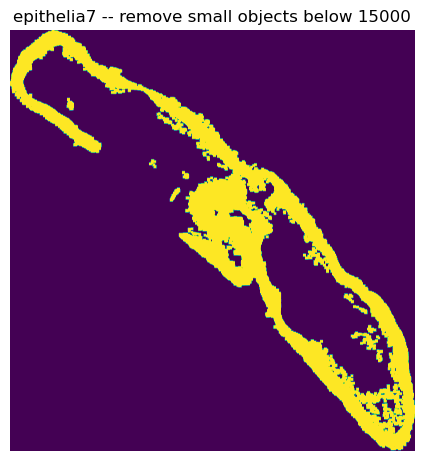

epithelia found


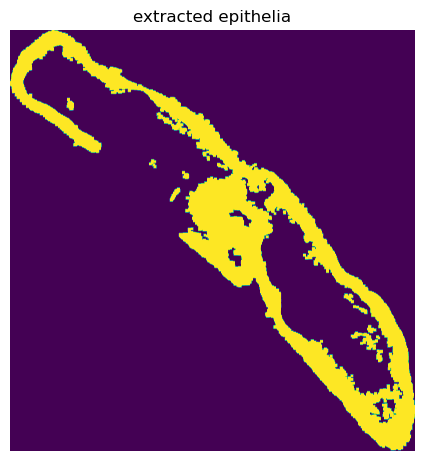

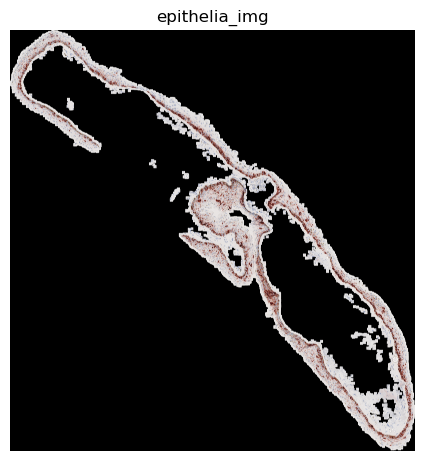

Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1810898A mela_ROI_1.tif Epithelia.png saved
stroma expanded
Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1810898A mela_ROI_1.tif Stroma.png saved
Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1810898A mela_ROI_1.tif.png saved


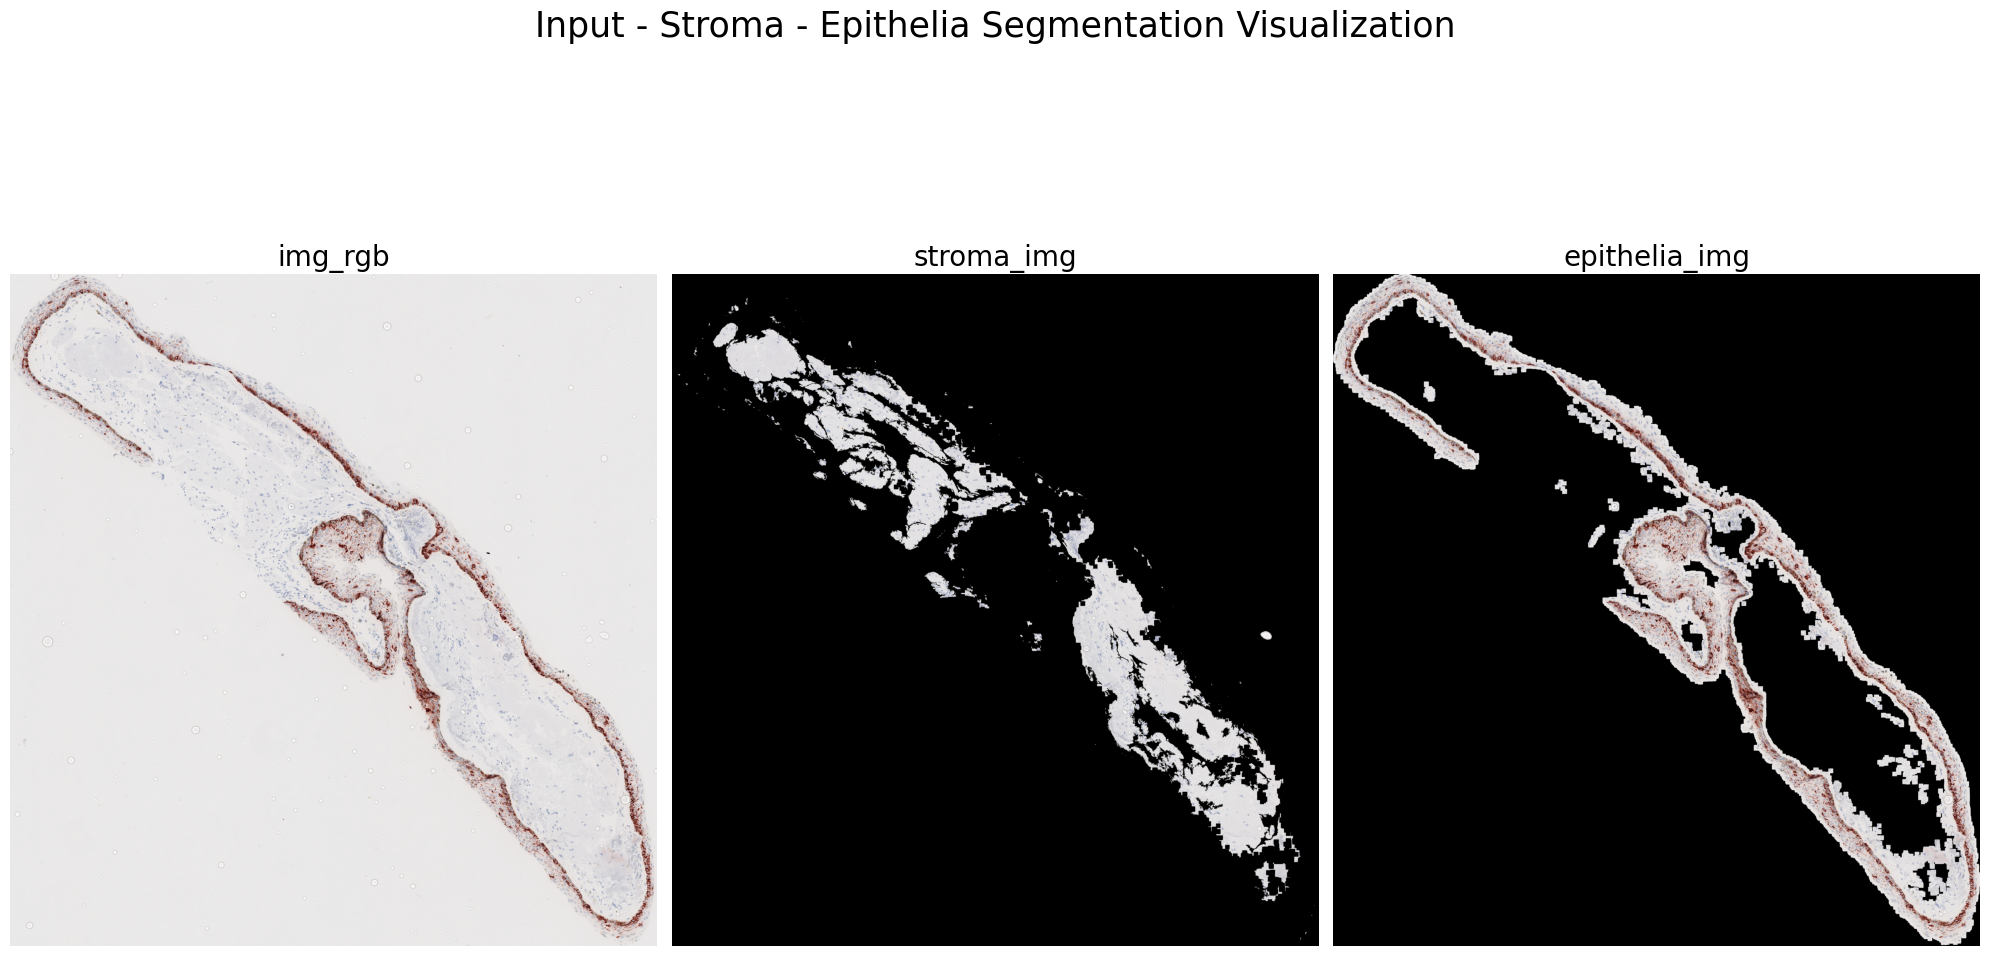

ITERATION FINISHED
Entered loop
Data/Melan-A/h1812404A melan a_ROI_1.tif
Checkpoint 1
Checkpoint 2

lumma_binned: most_pixels_bin = 19   most_pixels = 10901748
background found


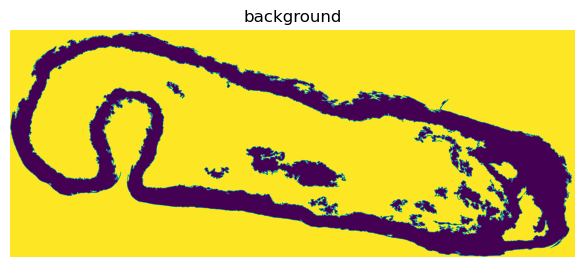

Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1812404A melan a_ROI_1.tif Red Chroma 100 Bins Representation.png saved


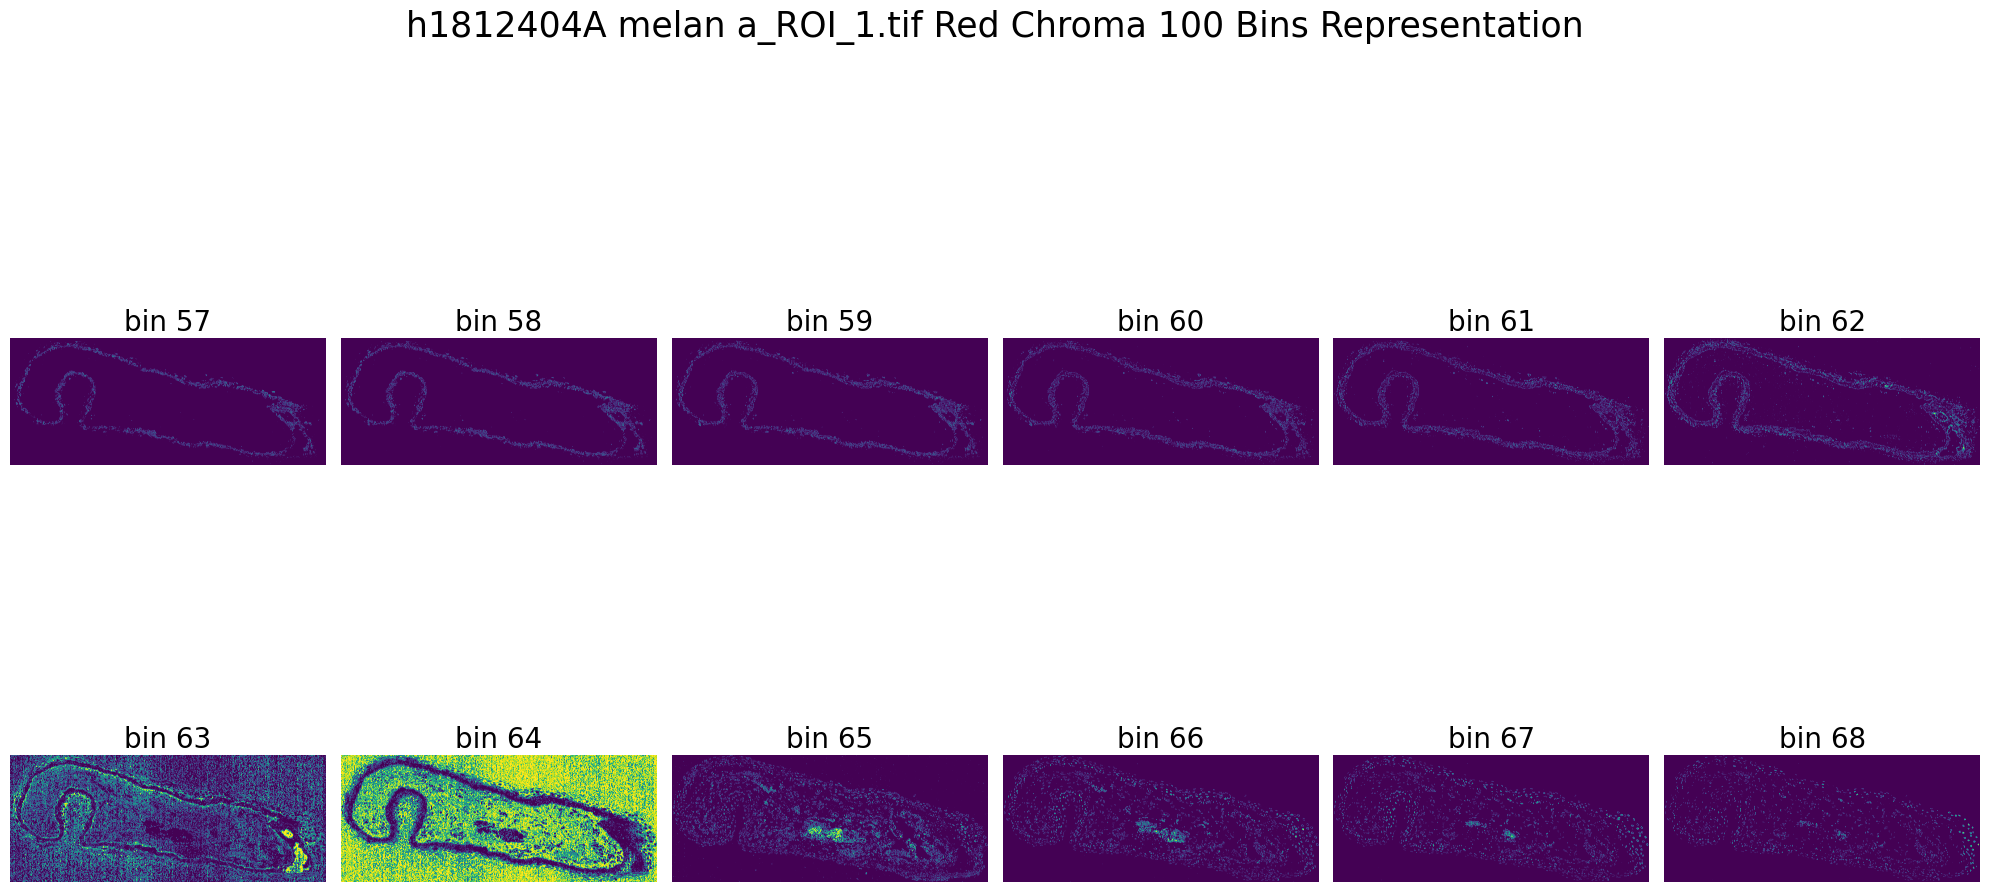


Cr_binned: most_pixels_bin = 64   most_pixels = 9568237
definite stroma found
Checkpoint 3
Cr_binned= [[64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 ...
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]]


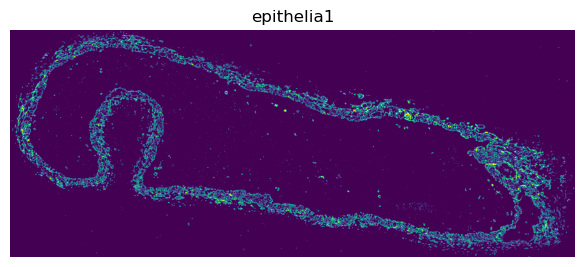

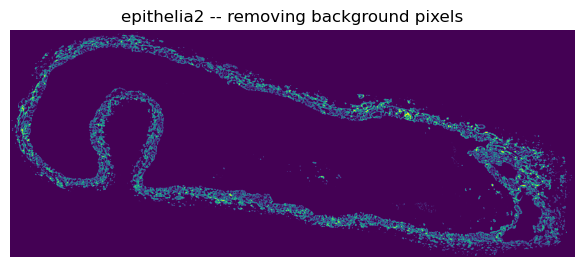

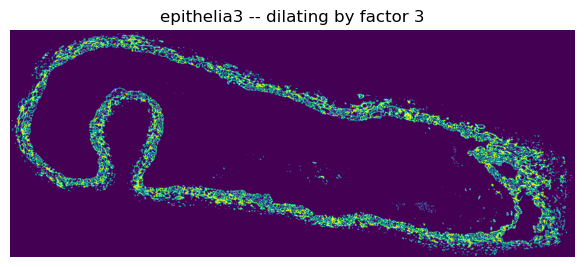

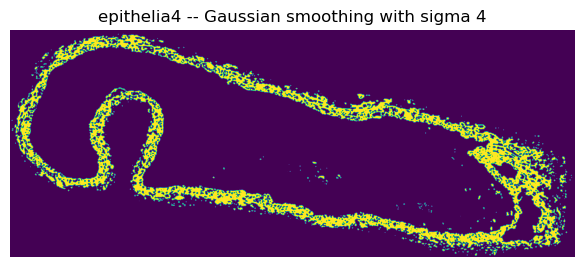

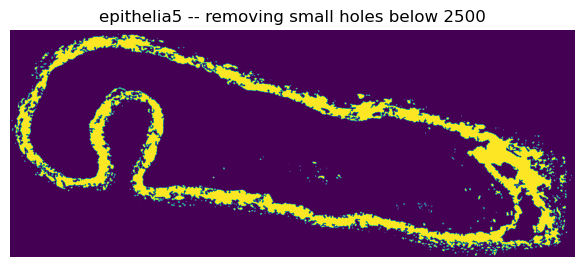

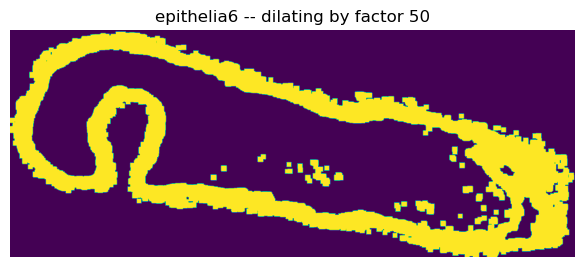

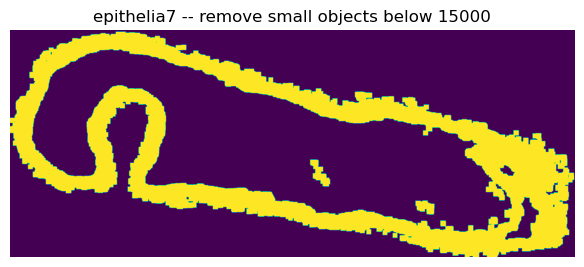

epithelia found


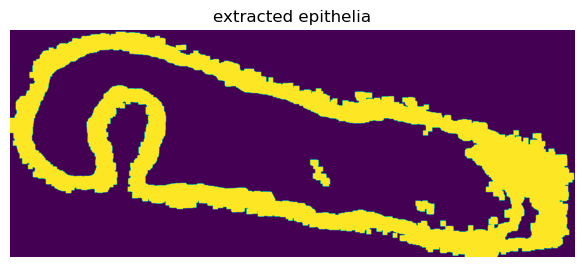

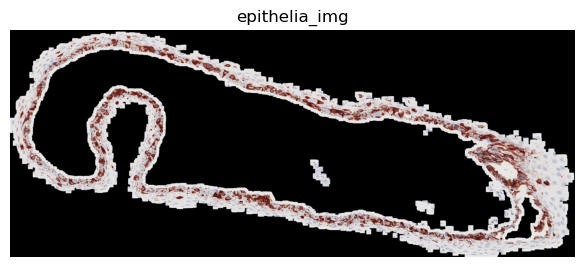

Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1812404A melan a_ROI_1.tif Epithelia.png saved
stroma expanded
Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1812404A melan a_ROI_1.tif Stroma.png saved
Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1812404A melan a_ROI_1.tif.png saved


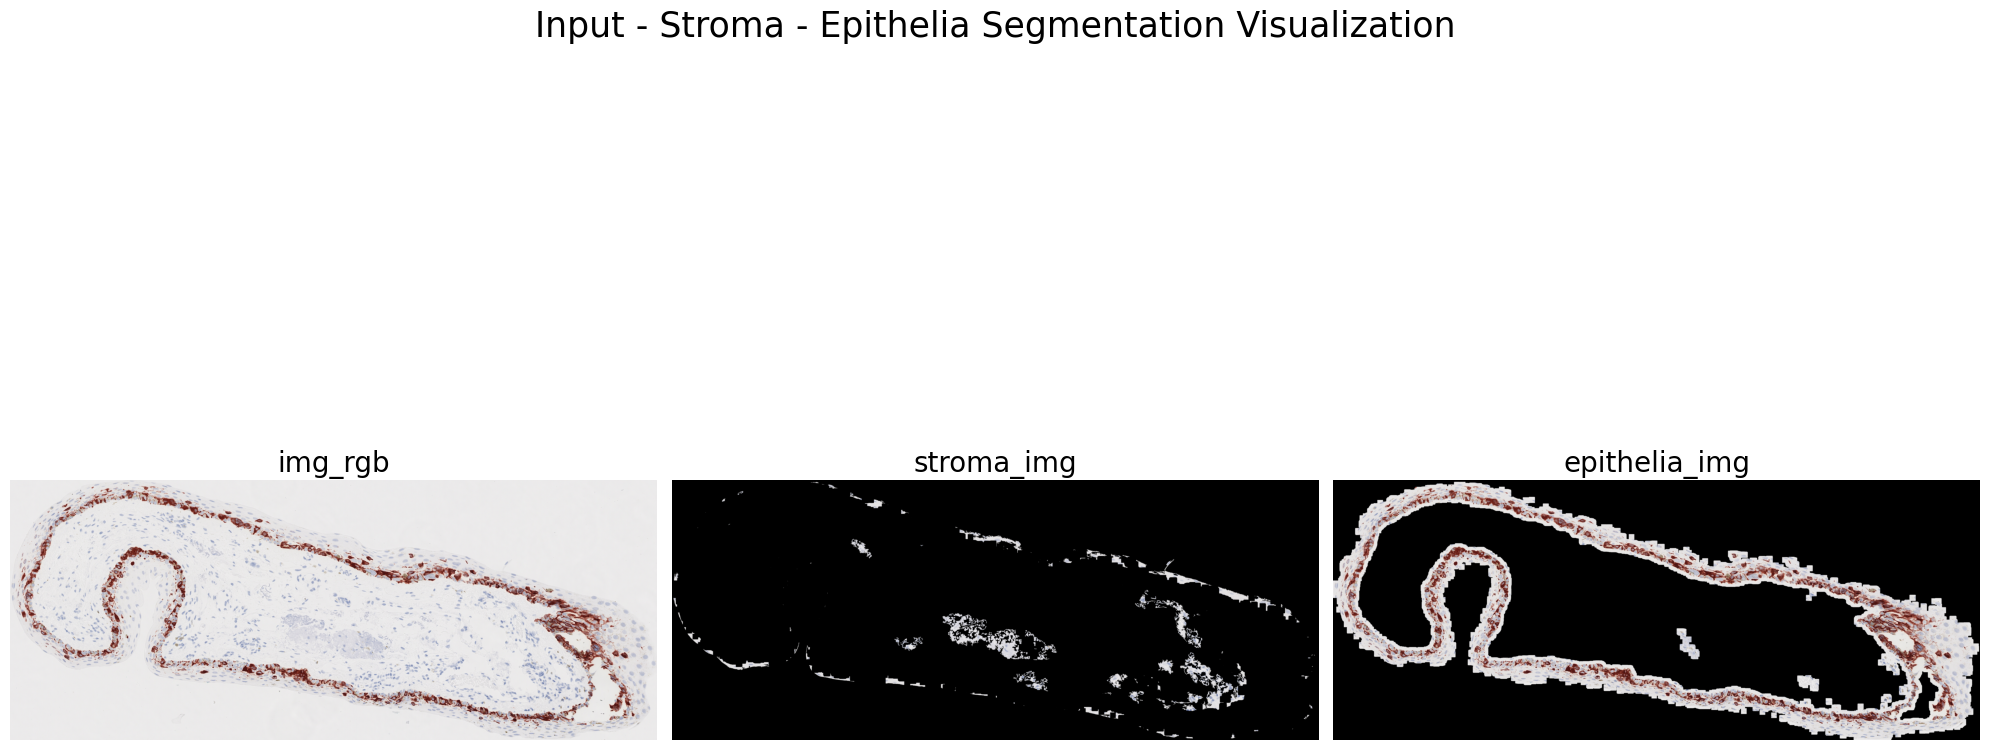

ITERATION FINISHED
Entered loop
Data/Melan-A/h1939646  mela_ROI_1.tif
Checkpoint 1
Checkpoint 2

lumma_binned: most_pixels_bin = 19   most_pixels = 20581903
background found


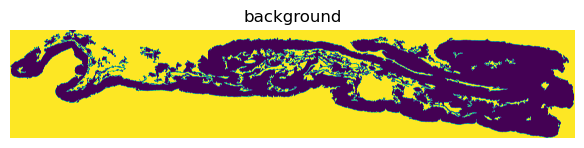

Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1939646  mela_ROI_1.tif Red Chroma 100 Bins Representation.png saved


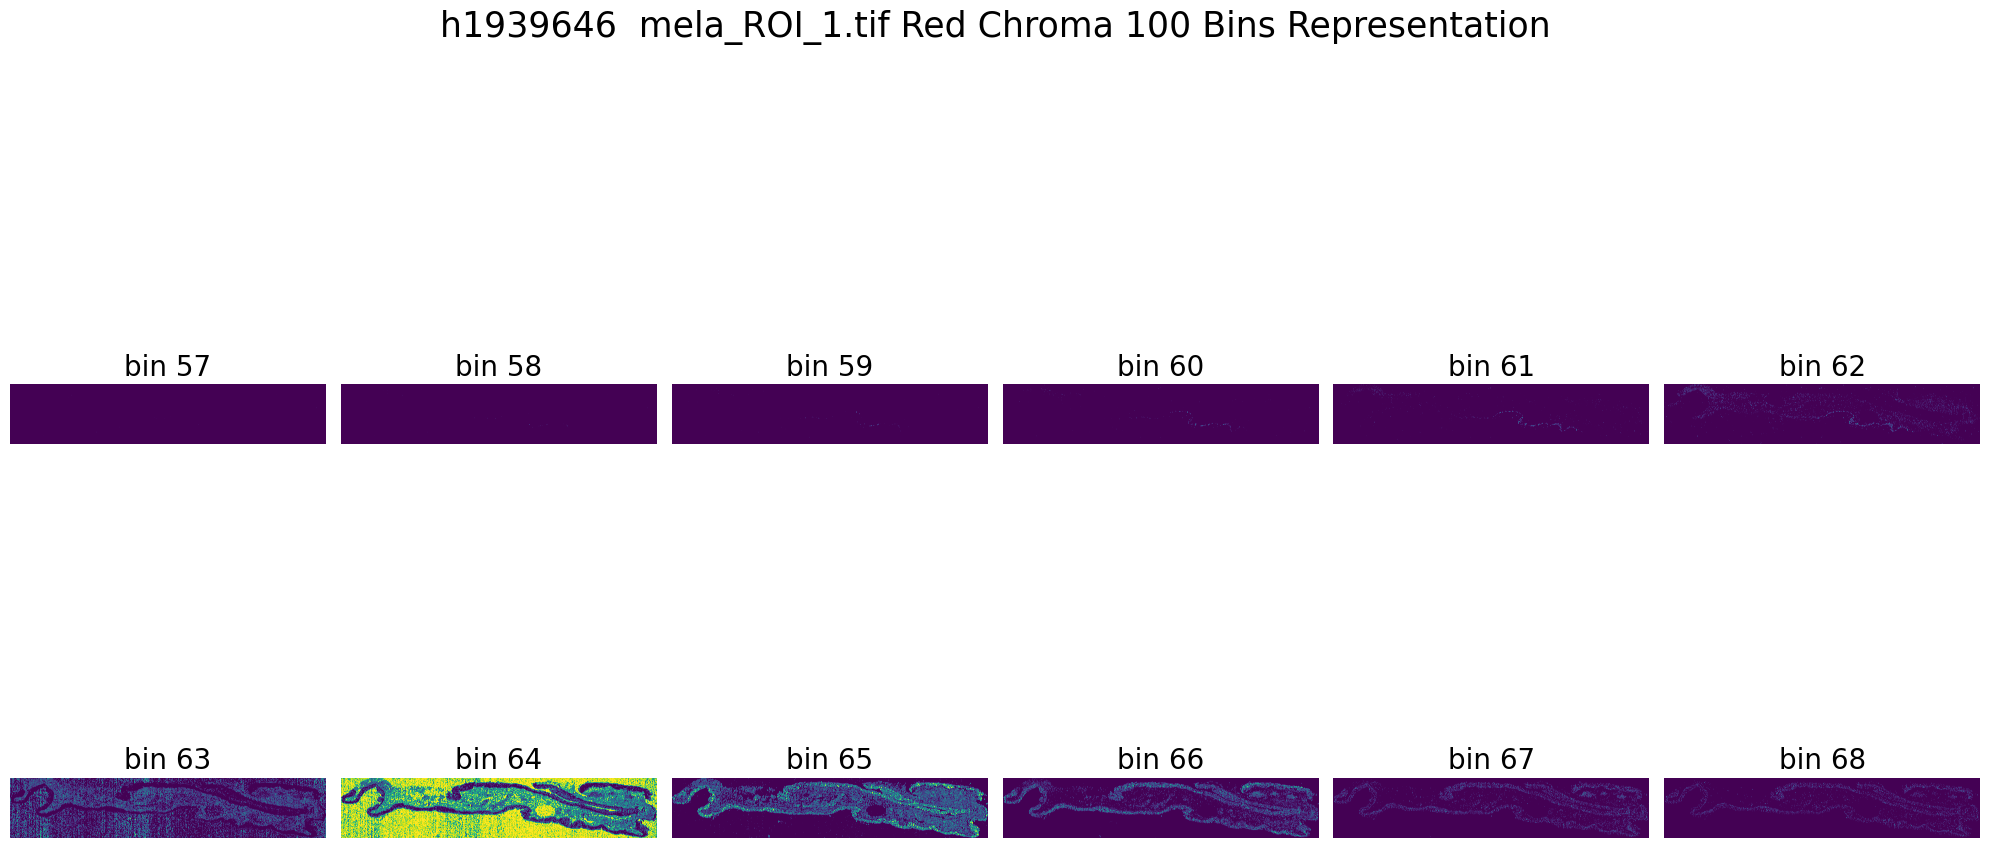


Cr_binned: most_pixels_bin = 64   most_pixels = 20190498
definite stroma found
Checkpoint 3
Cr_binned= [[64 64 64 ... 63 63 63]
 [64 64 64 ... 63 63 63]
 [64 64 64 ... 63 63 63]
 ...
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]]


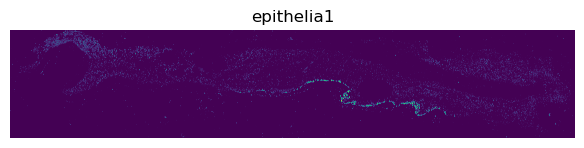

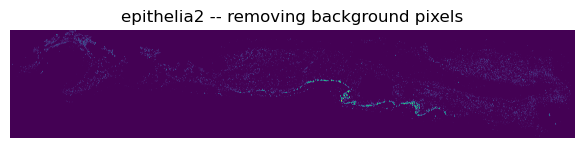

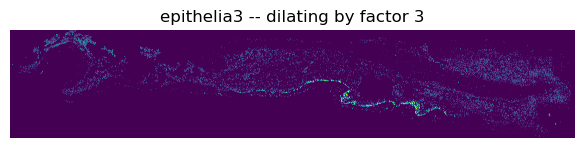

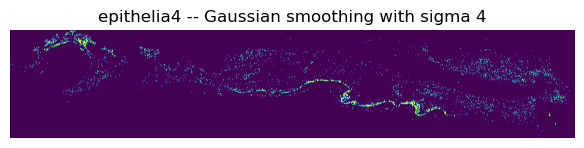

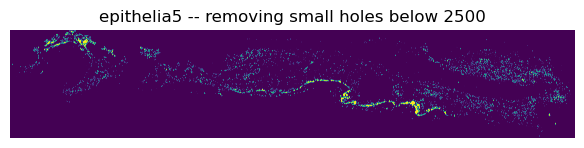

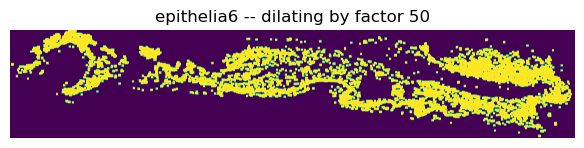

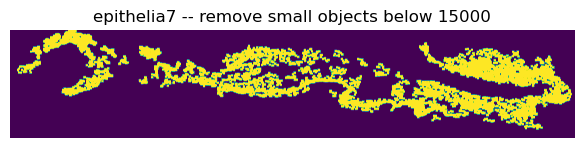

epithelia found


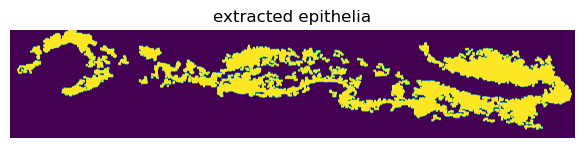

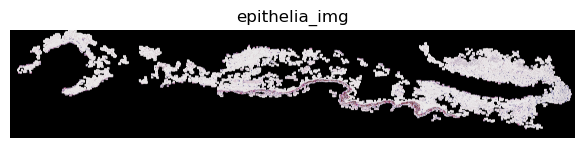

Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1939646  mela_ROI_1.tif Epithelia.png saved
stroma expanded
Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1939646  mela_ROI_1.tif Stroma.png saved
Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1939646  mela_ROI_1.tif.png saved


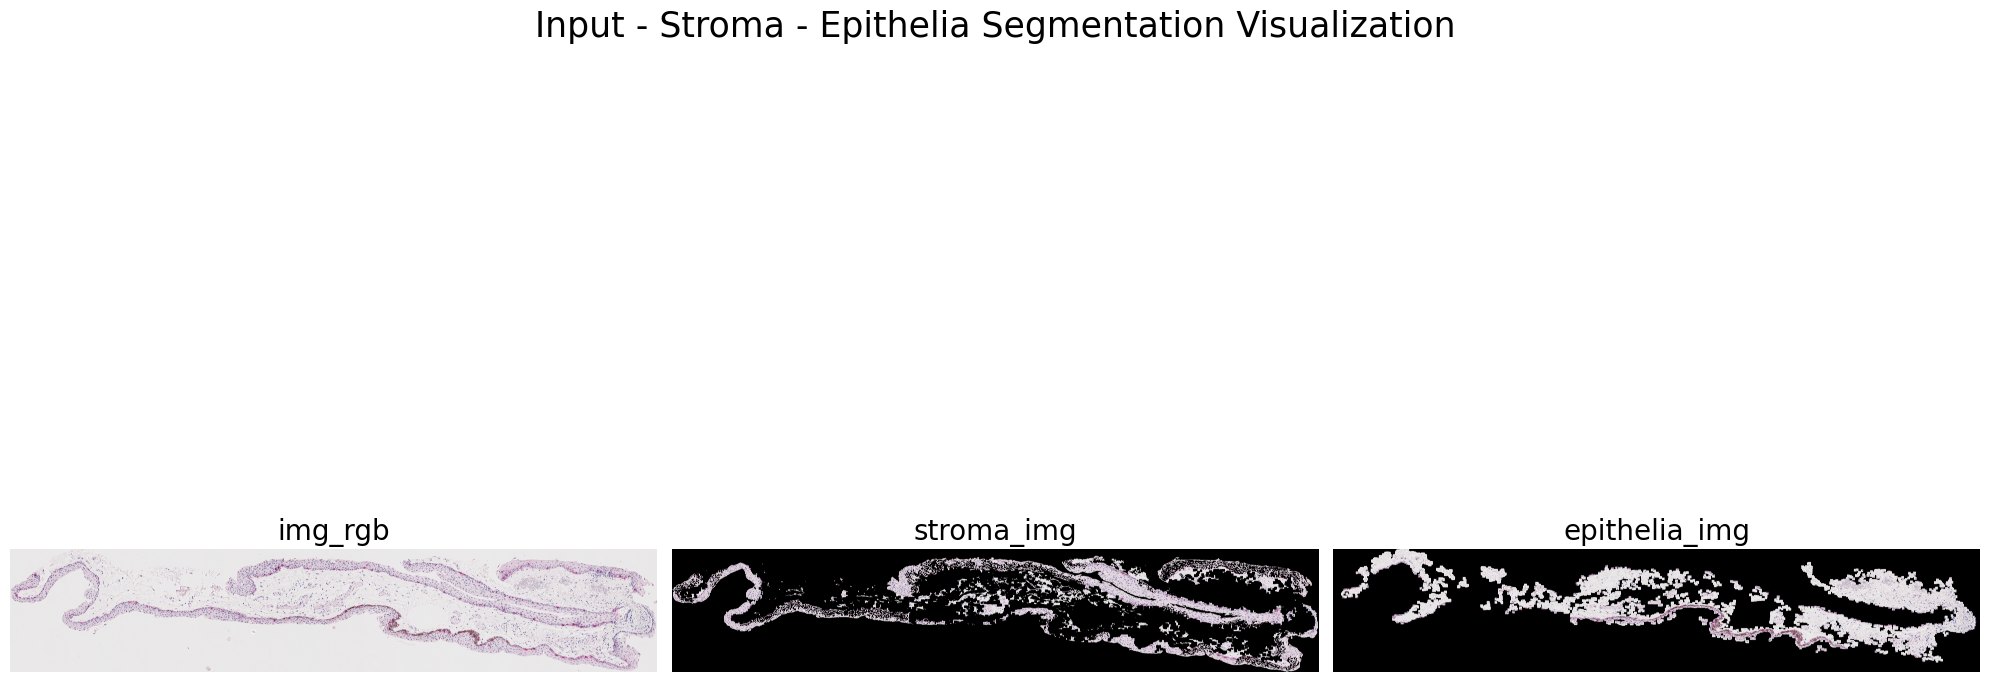

ITERATION FINISHED
done!


In [110]:
go(sample)

Entered loop
Data/Melan-A/h1812404B melan a_ROI_2.tif
Checkpoint 1
Checkpoint 2

lumma_binned: most_pixels_bin = 19   most_pixels = 58533052
background found


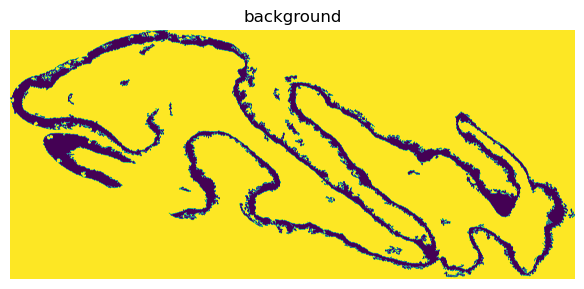

Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1812404B melan a_ROI_2.tif Red Chroma 100 Bins Representation.png saved


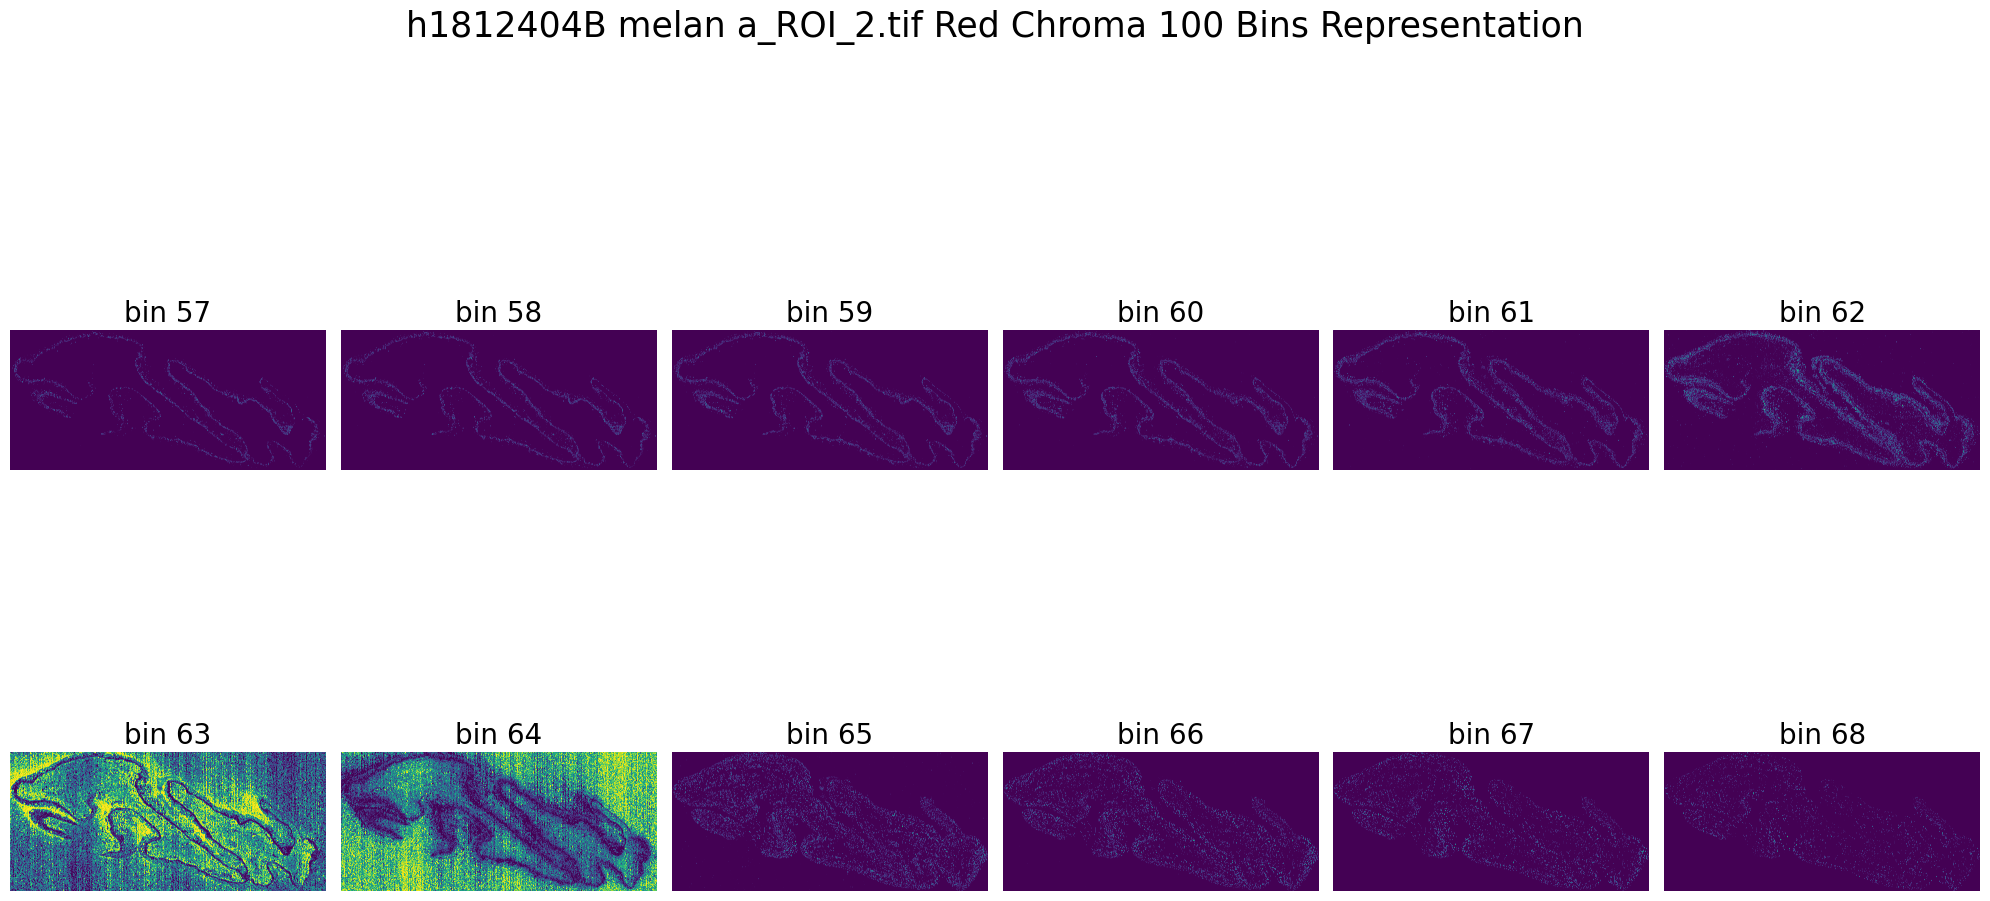


Cr_binned: most_pixels_bin = 63   most_pixels = 32958704
definite stroma found
Checkpoint 3
Cr_binned= [[63 63 63 ... 64 64 64]
 [63 63 63 ... 64 64 64]
 [63 63 63 ... 64 64 64]
 ...
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]]


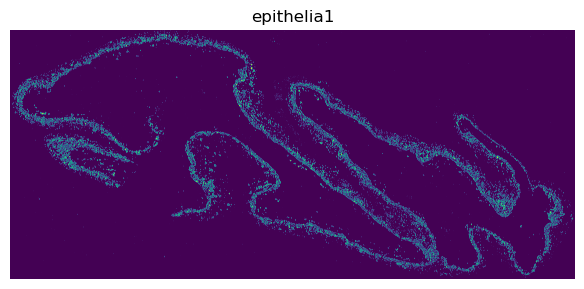

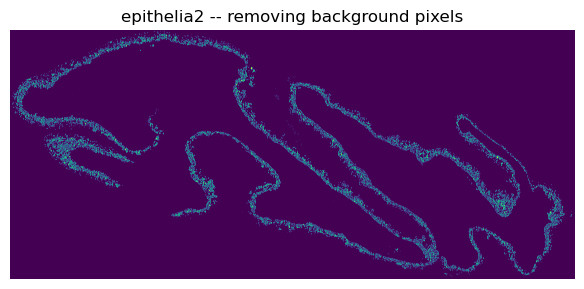

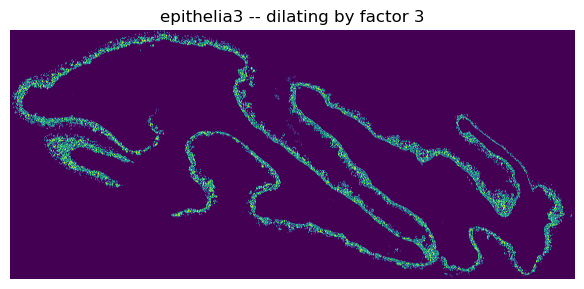

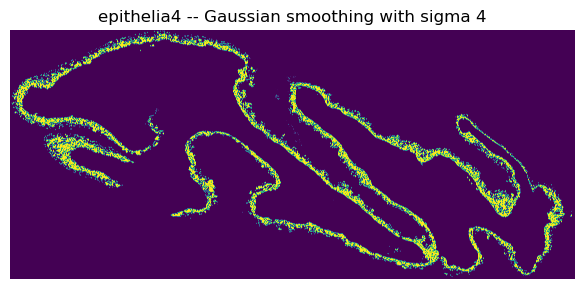

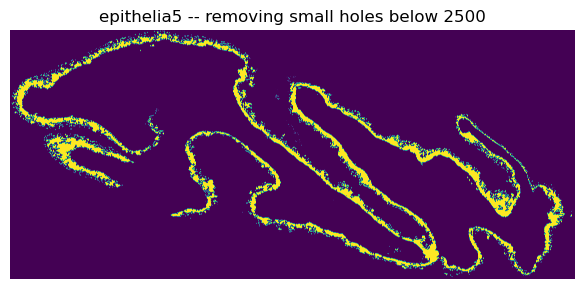

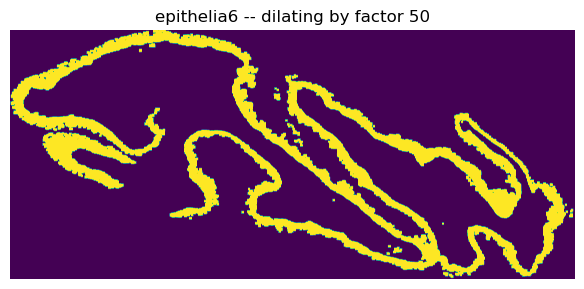

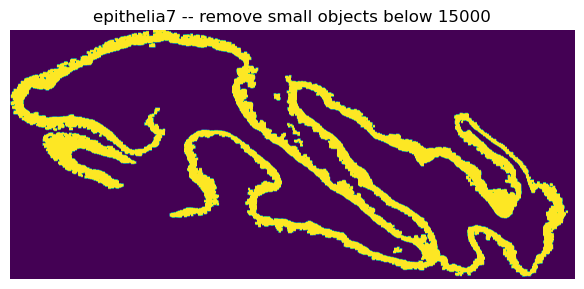

epithelia found


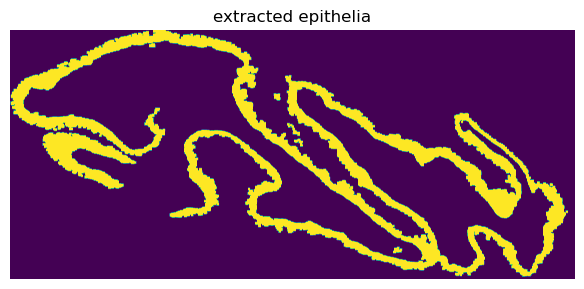

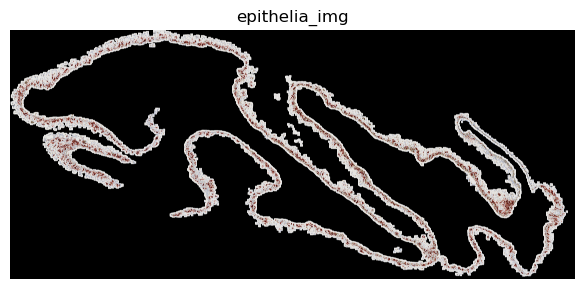

Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1812404B melan a_ROI_2.tif Epithelia.png saved
stroma expanded
Extracted Epithelium/Presentation 7 Extractions/Melan-A/h1812404B melan a_ROI_2.tif Stroma.png saved
Extracted Epithelium/Presentation 7 Extractions/Melan-A/Visualizations/h1812404B melan a_ROI_2.tif.png saved


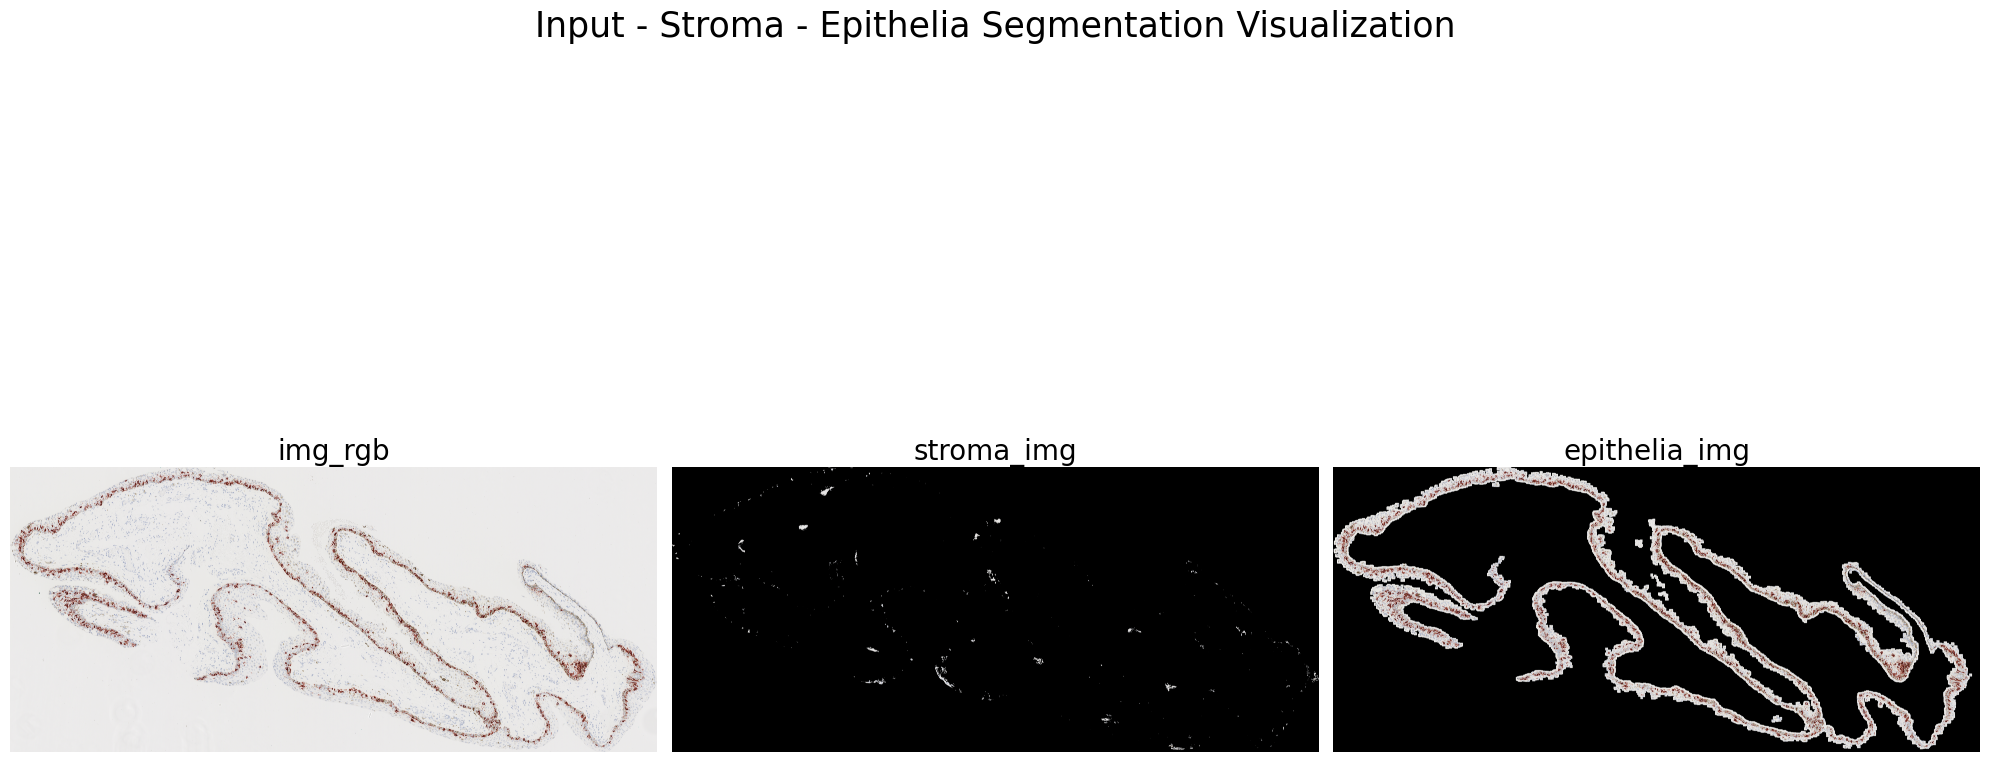

ITERATION FINISHED
done!


In [114]:
go(sample2)